In [1]:
import numpy as np
import pandas as pd
# pip install seaborn 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

In [2]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 'Cancelled': np.uint8, 
         'Year': np.uint16, 'FlightNum': np.uint16 , 'Distance': np.uint16, 
         'UniqueCarrier': str, 'CancellationCode': str, 'Origin': str, 'Dest': str,
         'ArrDelay': np.float16, 'DepDelay': np.float16, 'CarrierDelay': np.float16,
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 'SecurityDelay': np.float16,
         'LateAircraftDelay': np.float16, 'DepTime': np.float16}

In [3]:
%%time
# change the path if needed
path = '../../data/2008.csv.bz2'
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

CPU times: user 41.3 s, sys: 1.18 s, total: 42.5 s
Wall time: 42.6 s


In [4]:
flights_df['Date'] = pd.to_datetime(flights_df.rename(columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

In [5]:
num_flights_by_date = flights_df.groupby('Date').size()

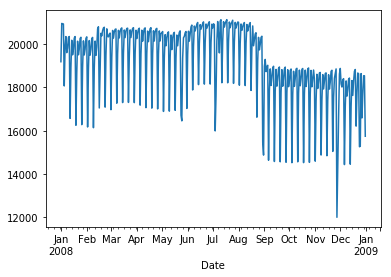

In [6]:
num_flights_by_date.plot(figsize=(6,4));

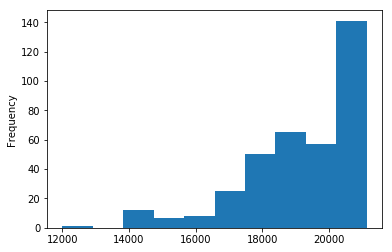

In [7]:
num_flights_by_date.plot(figsize=(6,4), kind='hist');

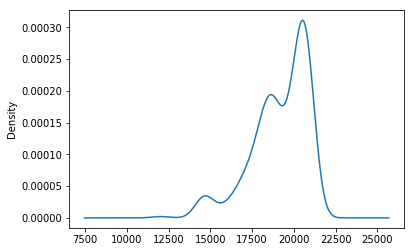

In [8]:
num_flights_by_date.plot(figsize=(6,4), kind='density');

## Решения

**1. Find top-10 carriers in terms of the number of completed flights (_UniqueCarrier_ column)?**

**Which of the listed below is _not_ in your top-10 list?**
- DL
- AA
- OO
- EV 

In [9]:
flights_df[flights_df['Cancelled'] == 0].groupby('UniqueCarrier').size().sort_values(ascending=False).head(10)

UniqueCarrier
WN    1189365
AA     587445
OO     554723
MQ     472362
US     447007
DL     445118
UA     438974
XE     364518
NW     344746
CO     294753
dtype: int64

In [10]:
# Asnwer: EV

**2. Plot distributions of flight cancellation reasons (_CancellationCode_).**

**What is the most frequent reason for flight cancellation? (Use this [link](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) to translate codes into reasons)**
- carrier
- weather conditions 
- National Air System
- security reasons

In [11]:
flights_df.head(1)

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03


In [12]:
flights_df.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               136246
UniqueCarrier              0
FlightNum                  0
ArrDelay              154699
DepDelay              136246
Origin                     0
Dest                       0
Distance                   0
Cancelled                  0
CancellationCode     6872294
CarrierDelay         5484993
WeatherDelay         5484993
NASDelay             5484993
SecurityDelay        5484993
LateAircraftDelay    5484993
Date                       0
dtype: int64

In [13]:
flights_df['CancellationCode'].nunique()

4

In [14]:
flights_df['CancellationCode'].unique()

array([nan, 'A', 'C', 'B', 'D'], dtype=object)

In [15]:
flights_df.groupby('CancellationCode').size().sort_values(ascending=False)

CancellationCode
B    54904
A    54330
C    28188
D       12
dtype: int64

In [16]:
flights_df[flights_df['Cancelled'] == 1].groupby('CancellationCode').size().sort_values(ascending=False)

CancellationCode
B    54904
A    54330
C    28188
D       12
dtype: int64

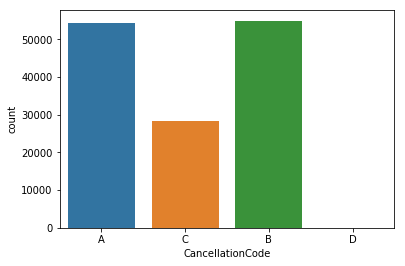

In [17]:
sns.countplot(flights_df['CancellationCode']);

In [18]:
# CancellationCode:
""" 
A	Carrier
B	Weather
C	National Air System
D	Security
"""

' \nA\tCarrier\nB\tWeather\nC\tNational Air System\nD\tSecurity\n'

In [19]:
# B is the most frequent: Weather
# weather conditions

**3. Which route is the most frequent, in terms of the number of flights?**

(Take a look at _'Origin'_ and _'Dest'_ features. Consider _A->B_ and _B->A_ directions as _different_ routes) 

 - New-York – Washington
 - San-Francisco – Los-Angeles 
 - San-Jose – Dallas
 - New-York – San-Francisco

In [20]:
flights_df.head(1)

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03


In [21]:
flights_df[flights_df['Cancelled'] == 0].groupby(['Origin','Dest']).size().sort_values(ascending=False).head(1)

Origin  Dest
SFO     LAX     13299
dtype: int64

In [22]:
# SFO: San Francisco, CA: San Francisco International
# LAX: Los Angeles, CA: Los Angeles International

In [23]:
# Answer: San-Francisco – Los-Angeles

**4. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.**

- 449 
- 539 
- 549 
- 668 

In [24]:
flights_df.head(1)

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03


In [25]:
df4 = flights_df[flights_df['DepDelay'] > 0].groupby(['Origin', 'Dest']).size().sort_values(ascending=False).head(5)

In [26]:
df4 = pd.DataFrame(df4)

In [27]:
df4.reset_index(inplace=True)

In [28]:
df4.rename(columns={0:'size'}, inplace=True)

In [29]:
df4

,Origin,Dest,size
0,LAX,SFO,6253
1,DAL,HOU,5742
2,SFO,LAX,5322
3,ORD,LGA,5311
4,HOU,DAL,5288


In [30]:
answer4 = pd.merge(left=flights_df, right=df4, on=['Origin','Dest'], how='inner')

In [31]:
answer4.dropna(subset=['WeatherDelay'], axis=0, inplace=True)

In [32]:
answer4[answer4['WeatherDelay'] != 0.0]['size'].count()

668

**5. Examine the hourly distribution of departure times. For that, create a new series from DepTime, removing missing values.**

**Choose all correct statements:**
 - Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).
 - Flights are uniformly distributed within time interval [0-23].
 - In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.

In [33]:
def normal(mu, sigma, x):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * (sigma**2)))

In [34]:
df5_3 = flights_df['DepTime']
df5_3 = pd.DataFrame(df5_3)
df5_3.dropna(subset=['DepTime'], axis=0, inplace=True)
df5_3['DepTimeHours'] = df5_3['DepTime'].apply(lambda x: int(x)//100 * 60)

In [35]:
mean_value = np.mean(df5_3.DepTimeHours)
sigma_value = np.std(df5_3.DepTimeHours)

(0, 1380)

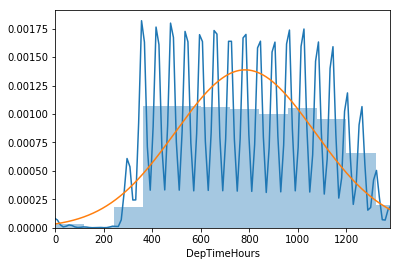

In [36]:
xx = np.linspace(0, 1380, 10000)
sns.distplot(df5_3.DepTimeHours, bins=12)
plt.plot(xx, normal(mean_value, sigma_value, xx))
plt.xlim(0,1380)

In [37]:
len(df5_3.DepTimeHours)

6873482

In [38]:
rand_number = np.random.uniform(low=0, high = 1380, size=10000)

(array([836., 836., 800., 821., 848., 872., 851., 846., 815., 804., 848.,
        823.]),
 array([1.18855252e-01, 1.15101840e+02, 2.30084826e+02, 3.45067811e+02,
        4.60050796e+02, 5.75033781e+02, 6.90016766e+02, 8.04999751e+02,
        9.19982736e+02, 1.03496572e+03, 1.14994871e+03, 1.26493169e+03,
        1.37991468e+03]),
 <a list of 12 Patch objects>)

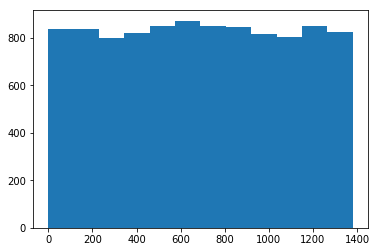

In [39]:
plt.hist(rand_number, bins=12)

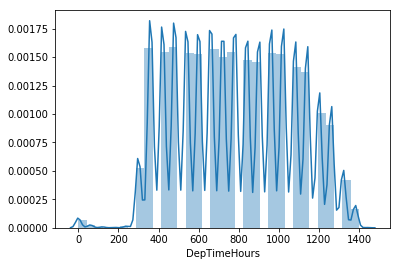

In [40]:
sns.distplot(df5_3.DepTimeHours, bins=35)

In [41]:
df5_2 = flights_df[(flights_df['Cancelled'] == 0) & (flights_df['DepTime'] > 0.0)]['DepTime']
df5_2 = pd.DataFrame(df5_2)
df5_2.dropna(subset=['DepTime'], axis=0, inplace=True)
df5_2['DepTimeMinutes'] = df5_2['DepTime'].apply(lambda x: int(x)//100 * 60 + int(x)%100)

In [42]:
mean_value = np.mean(df5_2.DepTimeMinutes)
sigma_value = np.std(df5_2.DepTimeMinutes)

(0, 1380)

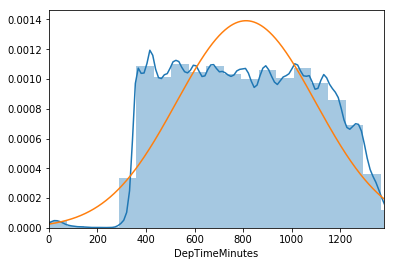

In [43]:
xx = np.linspace(0, 1380, 10000)
sns.distplot(df5_2.DepTimeMinutes, bins=20)
plt.plot(xx, normal(mean_value, sigma_value, xx))
plt.xlim(0,1380)

In [44]:
print (df5_2.DepTimeMinutes[df5_2.DepTimeMinutes <= 260].count())
print (df5_2.DepTimeMinutes[(df5_2.DepTimeMinutes >= 1140) & ((df5_2.DepTimeMinutes <= 1200))].count())

28649
395034


In [45]:
from scipy import stats

In [46]:
stats.shapiro(df5_2.DepTimeMinutes[df5_2.DepTimeMinutes <= 1380])

/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1310: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9636500477790833, 0.0)

In [47]:
stats.uniform(df5_2.DepTimeMinutes[df5_2.DepTimeMinutes <= 1380]).pdf

<bound method rv_frozen.pdf of <scipy.stats._distn_infrastructure.rv_frozen object at 0x117ebd5c0>>

In [48]:
stats.kstest(df5_2.DepTimeMinutes[df5_2.DepTimeMinutes <= 1380], stats.uniform(loc=0.0, scale=2000).cdf)

KstestResult(statistic=0.3238924116360937, pvalue=0.0)

In [49]:
stats.kstest(df5_2.DepTimeMinutes[df5_2.DepTimeMinutes <= 1380], "uniform") 

KstestResult(statistic=1.0, pvalue=0.0)

In [50]:
stats.uniform?

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


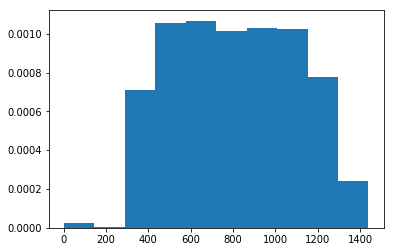

In [51]:
plt.hist(df5_2.DepTimeMinutes, normed=True, bins=10);

In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.

In [52]:
print (df5_2.DepTimeMinutes[df5_2.DepTimeMinutes <= 260].count())
print (df5_2.DepTimeMinutes[(df5_2.DepTimeMinutes >= 1140) & ((df5_2.DepTimeMinutes <= 1200))].count())

28649
395034


In [53]:
df5 = pd.DataFrame(flights_df.DepTime)
df5.dropna(subset=['DepTime'], axis=0, inplace=True)
df5['DepTimeMinutes'] = df5['DepTime'].apply(lambda x: int(x)//100 * 60 + int(x)%100)

In [54]:
23 * 60

1380

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


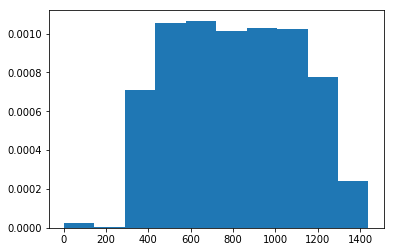

In [55]:
plt.hist(df5.DepTimeMinutes, normed=True, bins=10);

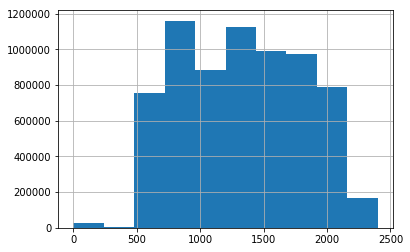

In [56]:
flights_df.DepTime.hist();

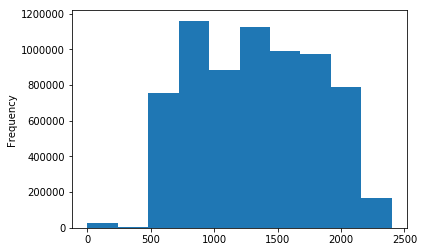

In [57]:
flights_df.DepTime.plot(kind='hist');

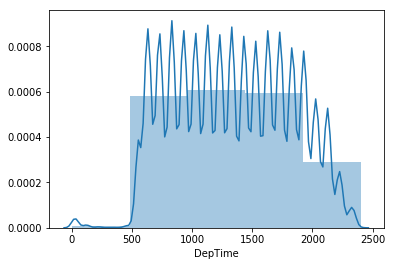

In [58]:
sns.distplot(flights_df['DepTime'].dropna(axis=0), bins=5)

In [60]:
def converter(x):
    hour = x / 100
    minute = x % 100
    return 

In [61]:
flights_df['DepTime2'] = flights_df['DepTime'].apply(lambda)

SyntaxError: invalid syntax (<ipython-input-61-cd509b9dc538>, line 1)

**6. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.**

**Choose all correct statements:**
- The number of flights during weekends is less than during weekdays (working days).
- The lowest number of flights is on Sunday.
- There are less flights during winter than during summer.  

In [62]:
flights_df['DayOfWeek'].unique()

array([4, 5, 6, 7, 1, 2, 3], dtype=uint64)

In [63]:
print (len(flights_df[(flights_df['DayOfWeek'] != 6) | (flights_df['DayOfWeek'] != 7)]))
print (len(flights_df[(flights_df['DayOfWeek'] == 6) | (flights_df['DayOfWeek'] == 7)]))

7009728
1834423


In [64]:
flights_df.groupby('DayOfWeek')['Year'].count().sort_values(ascending=True)

DayOfWeek
6     857536
7     976887
2    1032049
4    1032224
5    1035166
1    1036201
3    1039665
Name: Year, dtype: int64

In [65]:
flights_df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=uint64)

In [66]:
Dec, Jan, Feb : Winter ; 
    June,July,August: Summer.

IndentationError: unexpected indent (<ipython-input-66-f95b4f9c9195>, line 2)

In [ ]:
summer = flights_df[(flights_df['Month'] == 8) | (flights_df['Month'] == 6) | (flights_df['Month'] == 7)]
winter = flights_df[(flights_df['Month'] == 1) | (flights_df['Month'] == 12) | (flights_df['Month'] == 2)]

In [ ]:
summer = flights_df[(flights_df['Month'] <= 8) & (flights_df['Month'] >= 6)]
winter = flights_df[(flights_df['Month'] <= 2) | (flights_df['Month'] == 12)]

In [ ]:
print (len(summer))
print (len(winter))

In [ ]:
print (len(summer))
print (len(winter))

**7. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.**

**Choose all correct statements:**
- December has the highest rate of cancellations due to weather. 
- The highest rate of cancellations in September is due to Security reasons.
- April's top cancellation reason is carriers.
- Flights cancellations due to National Air System are more frequent than those due to carriers.

In [133]:
# December has the highest rate of cancellations due to weather
flights_df[flights_df['CancellationCode'] == 'B'].groupby('Month').size().sort_values(ascending=False)

Month
12    10042
2     10034
3      7520
1      6711
9      6478
8      3582
6      3448
7      2612
4      1479
5      1461
11      937
10      600
dtype: int64

In [ ]:
# Aswer1: True

In [128]:
# The highest rate of cancellations in September is due to Security reasons.
flights_df[flights_df['Month'] == 9].groupby('CancellationCode').size().sort_values(ascending=False)

CancellationCode
B    6478
A    2246
C    1188
D       1
dtype: int64

In [122]:
# Answer2: False

In [129]:
# April's top cancellation reason is carriers
flights_df[flights_df['Month'] == 4].groupby('CancellationCode').size().sort_values(ascending=False)

CancellationCode
A    7312
C    1564
B    1479
dtype: int64

In [124]:
# Answer3: True

In [130]:
# Flights cancellations due to National Air System are more frequent than those due to carriers.
flights_df.groupby('CancellationCode')['CancellationCode'].size().sort_values(ascending=False)

CancellationCode
B    54904
A    54330
C    28188
D       12
Name: CancellationCode, dtype: int64

In [134]:
# Answer4: False

**8. Which month has the greatest number of cancellations due to Carrier?** 
- May
- January
- September
- April 

In [135]:
flights_df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Date'],
      dtype='object')

In [136]:
df8 = flights_df[flights_df['CancellationCode'] == 'A']\
                        .groupby('Month').size().sort_values(ascending=False)

In [137]:
df8 = pd.DataFrame(df8)

In [138]:
df8.reset_index(inplace=True)

In [139]:
df8.rename(columns={0:'size'}, inplace=True)

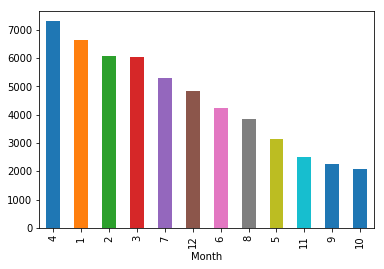

In [140]:
df8.plot(x='Month', y='size', kind='bar', legend=None);

**9. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.**

- 9E
- EV
- HA
- AA

In [110]:
df9 = flights_df[(flights_df['Cancelled'] == 1) & (flights_df['CancellationCode'] == 'A') &\
           (flights_df['Month'] == 4)]\
            .groupby('UniqueCarrier').size()\
            .sort_values(ascending=False)

In [111]:
df9 = pd.DataFrame(df9)

In [112]:
df9.reset_index(inplace=True)

In [113]:
df9.rename(columns={0:'size'}, inplace=True)

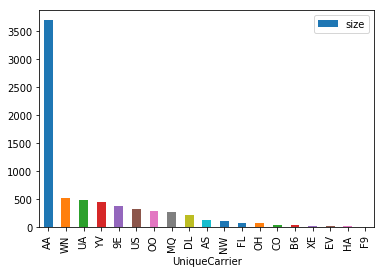

In [114]:
df9.plot(x='UniqueCarrier', y='size', kind='bar')

**10. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay').
[Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html) can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile.**

- EV
- OO
- AA
- AQ 

In [67]:
df10 = flights_df.groupby('UniqueCarrier')['ArrDelay', 'DepDelay'].median()\
            .sort_values(by= ['ArrDelay', 'DepDelay'], ascending=True)

In [99]:
arrdelay = flights_df[flights_df['ArrDelay'] > 0.0][['UniqueCarrier','ArrDelay']]

In [100]:
arrdelay.head(1)

,UniqueCarrier,ArrDelay
1,WN,2.0


In [91]:
arrdelay.rename(columns={'ArrDelay':'delay'}, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [101]:
depdelay = flights_df[flights_df['DepDelay'] > 0.0][['UniqueCarrier','DepDelay']]

In [102]:
depdelay.rename(columns={'DepDelay':'delay'}, inplace=True)

In [103]:
df10 = arrdelay.append(depdelay)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [104]:
df10.groupby('UniqueCarrier')['delay'].median().sort_values(ascending=True)

UniqueCarrier
AQ     7.0
HA     7.0
WN     9.0
F9    10.0
US    11.0
CO    11.0
AS    12.0
DL    12.0
NW    14.0
FL    15.0
OO    15.0
UA    17.0
9E    17.0
XE    18.0
AA    18.0
MQ    18.0
EV    19.0
B6    21.0
OH    25.0
YV    26.0
Name: delay, dtype: float16

In [83]:
df10 = flights_df[(flights_df['ArrDelay'] > 0.0) & (flights_df['DepDelay'] > 0.0)].groupby('UniqueCarrier').median()

In [84]:
df10

,Year,Month,DayofMonth,DayOfWeek,DepTime,FlightNum,ArrDelay,DepDelay,Distance,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
UniqueCarrier,,,,,,,,,,,,,,,
9E,2008,5,15,4,1500.0,4725,27.0,25.0,449,0,0.0,0.0,2.0,0.0,0.0
AA,2008,6,16,4,1537.0,1275,28.0,26.0,1013,0,2.0,0.0,5.0,0.0,7.0
AQ,2008,1,12,5,1447.0,228,10.0,9.0,163,0,18.0,0.0,0.0,0.0,0.0
AS,2008,6,16,4,1519.0,321,21.0,19.0,866,0,0.0,0.0,3.0,0.0,0.0
B6,2008,6,16,4,1627.0,452,35.0,31.0,1028,0,2.0,0.0,8.0,0.0,14.0
CO,2008,6,16,4,1525.0,768,22.0,20.0,1091,0,0.0,0.0,10.0,0.0,0.0
DL,2008,7,16,4,1519.0,1093,21.0,18.0,692,0,2.0,0.0,8.0,0.0,3.0
EV,2008,6,15,4,1503.0,4656,27.0,26.0,443,0,12.0,0.0,3.0,0.0,0.0
F9,2008,6,16,4,1530.0,516,16.0,13.0,862,0,5.0,0.0,12.0,0.0,0.0


In [ ]:
flights_df[(flights_df['ArrDelay'] > 0.0) & (flights_df['DepDelay'] > 0.0)]\
            .groupby('UniqueCarrier')['ArrDelay', 'DepDelay'].median()\
            .sort_values(by= ['ArrDelay', 'DepDelay'], ascending=True).head(1)

In [284]:
flights_df[(flights_df['ArrDelay'] > 0.0) & (flights_df['DepDelay'] > 0.0)]\
            .groupby('UniqueCarrier')['ArrDelay', 'DepDelay'].median()\
            .sort_values(by= ['ArrDelay', 'DepDelay'], ascending=True).head(1)

,ArrDelay,DepDelay
UniqueCarrier,,
AQ,10.0,9.0
HA,11.0,9.0
F9,16.0,13.0
WN,16.0,18.0
DL,21.0,18.0
AS,21.0,19.0
US,22.0,19.0
CO,22.0,20.0
FL,23.0,20.0
